In [1]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
#leitura do dataset
df = pd.read_excel(r'./datasets/AdventureWorks.xlsx')

In [3]:
#pd.options.display.float_format = '{:20, .2f}'.format

In [4]:
#verificar quantidade de linhas e colunas
df.shape

(904, 16)

In [5]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [6]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [7]:
#qual foi o valor da receita total?
df['Valor Venda'].sum()

5984606.1426

In [8]:
# Qual o custo total?
df['Custos'] = df['Custo Unitário'] * df['Quantidade'] #criando coluna de custos

In [9]:
# Qual o custo total?
df.Custos.sum()

2486783.05

In [10]:
#Total de lucro
df['Lucro'] = df['Valor Venda'] - df['Custos'] #criando coluna do lucro

df['Lucro'].sum()

3497823.0926

In [11]:
#Criando coluna tempo envio para sabermos o tempo de envio após a compra de um produto
df['Tempo_Envio_Dias'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [12]:
# calculando a média do tempo de envio por marca
df.groupby('Marca')['Tempo_Envio_Dias'].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_Envio_Dias, dtype: float64

In [13]:
# verificando se temos dados faltantes
df.isnull().sum()

Data Venda          0
Data Envio          0
ID Loja             0
ID Produto          0
ID Cliente          0
No. Venda           0
Custo Unitário      0
Preço Unitário      0
Quantidade          0
Valor Desconto      0
Valor Venda         0
Produto             0
Fabricante          0
Marca               0
Classe              0
Cor                 0
Custos              0
Lucro               0
Tempo_Envio_Dias    0
dtype: int64

In [18]:
#agrupando dados por ano e por marca
ano = df['Data Venda'].dt.year
marca = df['Marca']
cor = df['Cor']
df.groupby([ano, marca, cor])['Lucro'].sum()

Data Venda  Marca            Cor   
2008        Adventure Works  Black              151,418.20
                             Red                155,222.96
            Contoso          Silver              28,935.70
                             White               27,480.30
            Fabrikam         Black              640,066.37
                             Grey               684,810.52
                             White              232,143.66
2009        Adventure Works  Black              215,767.36
                             Red                189,627.72
            Contoso          Silver              69,224.80
                             White               69,034.15
            Fabrikam         Black              387,881.72
                             Grey               425,214.95
                             White              220,994.68
Name: Lucro, dtype: float64

In [17]:
pd.options.display.float_format = '{:20,.2f}'.format

In [27]:
# resetando o indice
ano = df['Data Venda'].dt.year
marca = df['Marca']
lucro_ano = df.groupby([ano, marca])['Lucro'].sum().sort_values(ascending=False).reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Fabrikam,"1,557,020.55"
1,2009,Fabrikam,"1,034,091.35"
2,2009,Adventure Works,"405,395.08"
3,2008,Adventure Works,"306,641.16"
4,2009,Contoso,"138,258.95"
5,2008,Contoso,"56,416.00"


In [31]:
#qual o total de produtos vendidos
produtos_vendidos = df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False).reset_index()
produtos_vendidos

,Produto,Quantidade
0,Headphone Adapter for Contoso Phone E130 Silver,25232
1,Headphone Adapter for Contoso Phone E130 White,25008
2,Adventure Works Laptop15.4W M1548 Black,1089
3,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,1087
4,Adventure Works Laptop15.4W M1548 Red,1047
5,Fabrikam Trendsetter 2/3'' 17mm X100 Black,926
6,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,884
7,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,845
8,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,789


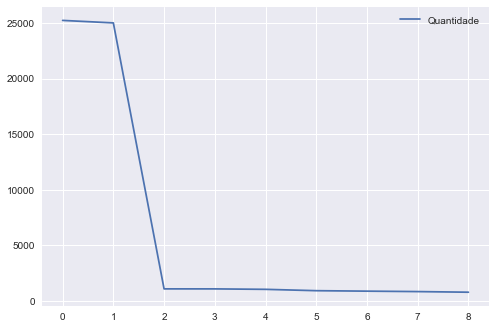

In [33]:
produtos_vendidos.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

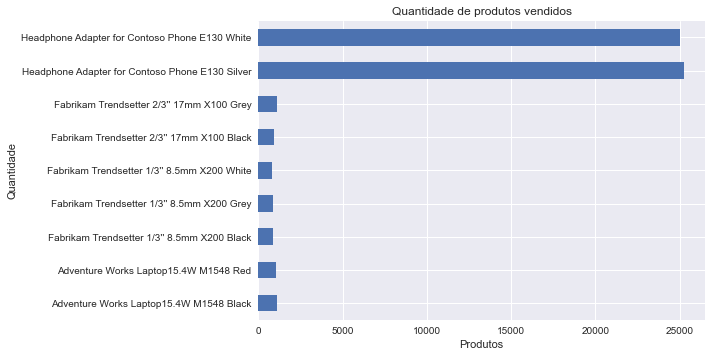

In [86]:
produtos_vendidos.groupby('Produto')['Quantidade'].sum().plot.barh(title='Quantidade de produtos vendidos')
plt.xlabel('Produtos')
plt.ylabel('Quantidade');
plt.savefig('./imagens/Quantidade de produtos vendidos.png');

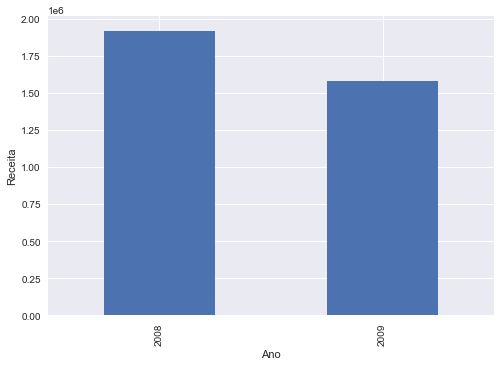

In [87]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.bar()
plt.xlabel('Ano')
plt.ylabel('Receita')
plt.savefig('./imagens/Lucro por ano.png');

In [61]:
#apenas as vendas de 2009
vendas_2009 = df[df['Data Venda'].dt.year == 2009]
vendas_2009.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custos,Lucro,Tempo_Envio_Dias
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11


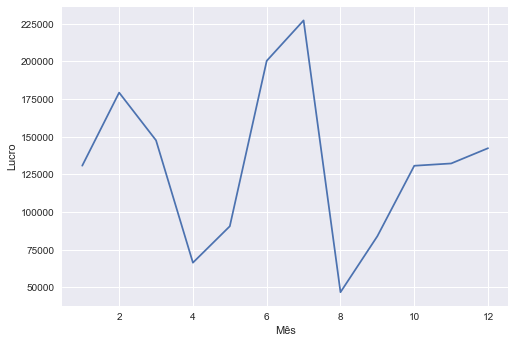

In [65]:
#lucro por mes no ano de 2009
meses = df['Data Venda'].dt.month
vendas_2009.groupby(meses)['Lucro'].sum().plot()
plt.xlabel('Mês')
plt.ylabel('Lucro');
plt.savefig('Lucro por mes 2009.png');

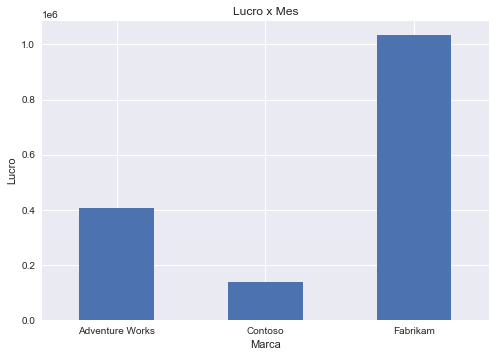

In [82]:
vendas_2009.groupby('Marca')['Lucro'].sum().plot.bar(title='Lucro x Mes')
plt.xlabel('Marca')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal')
plt.savefig('./imagens/Lucro Mes por Marca.png');

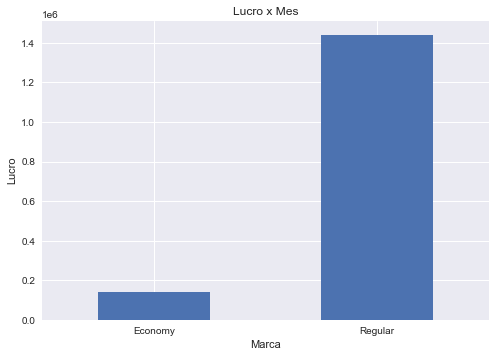

In [83]:
vendas_2009.groupby('Classe')['Lucro'].sum().plot.bar(title='Lucro x Mes')
plt.xlabel('Marca')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal')
plt.savefig('./imagens/Lucro Mes por classe.png');

In [69]:
df['Tempo_Envio_Dias'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_Envio_Dias, dtype: float64

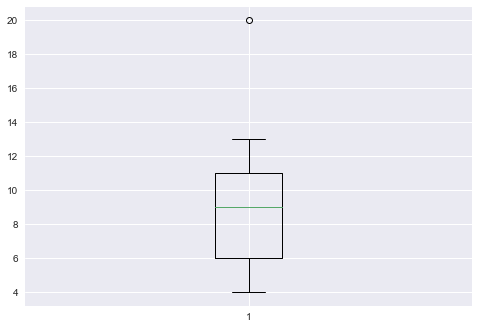

In [84]:
# gráfico de boxplot
plt.boxplot(df['Tempo_Envio_Dias'])
plt.savefig('Tempo de envio boxplot.png');

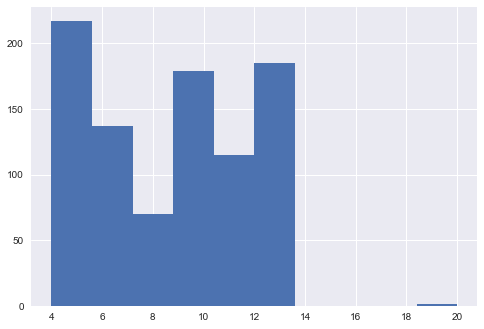

In [85]:
#histograma
plt.hist(df['Tempo_Envio_Dias'])
plt.savefig('Tempo de envio histograma.png');

In [74]:
#Tempo minimo de envio
df['Tempo_Envio_Dias'].min()

4

In [75]:
#tempo máximo de envio
df['Tempo_Envio_Dias'].max()

20

In [77]:
#Salvando arquivo no formato csv
df.to_csv('df_vendas_novo.csv', index=False)